<a href="https://colab.research.google.com/github/tranletuhien/Tu-Hien/blob/main/TienVN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/BTAI

/content/drive/MyDrive/BTAI


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing import  ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/BTAI/Tien/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 426 images belonging to 6 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'100K': 0, '10K': 1, '20K': 2, '500K': 3, '50K': 4, '5K': 5}

In [ ]:
#mô hình CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))


# Duỗi thẳng dữ liệu 
model.add(Flatten())

# Tạo lớp thứ nhất với 256 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
# Tạo lớp thứ hai với 3 tín hiệu ra
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
from keras.utils import to_categorical # one hot encoding cho output
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
14/14 [==============================] - 153s 10s/step - loss: 9.1339 - accuracy: 0.2981
Epoch 2/50
14/14 [==============================] - 36s 2s/step - loss: 1.5439 - accuracy: 0.3615
Epoch 3/50
14/14 [==============================] - 36s 2s/step - loss: 1.4298 - accuracy: 0.4319
Epoch 4/50
14/14 [==============================] - 36s 2s/step - loss: 1.2856 - accuracy: 0.4789
Epoch 5/50
14/14 [==============================] - 41s 3s/step - loss: 1.2283 - accuracy: 0.5023
Epoch 6/50
14/14 [==============================] - 37s 3s/step - loss: 1.1250 - accuracy: 0.5540
Epoch 7/50
14/14 [==============================] - 35s 2s/step - loss: 0.9737 - accuracy: 0.6009
Epoch 8/50
14/14 [==============================] - 36s 2s/step - loss: 0.9117 - accuracy: 0.6784
Epoch 9/50
14/14 [==============================] - 35s 2s/step - loss: 0.7984 - accuracy: 0.7019
Epoch 10/50
14/14 [==============================] - 35s 2s/step - loss: 0.7593 - accuracy: 0.7230
Epoch 11/50
14/14

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.017780710011720657
Train Accuracy 0.9953051805496216


<function matplotlib.pyplot.show(close=None, block=None)>

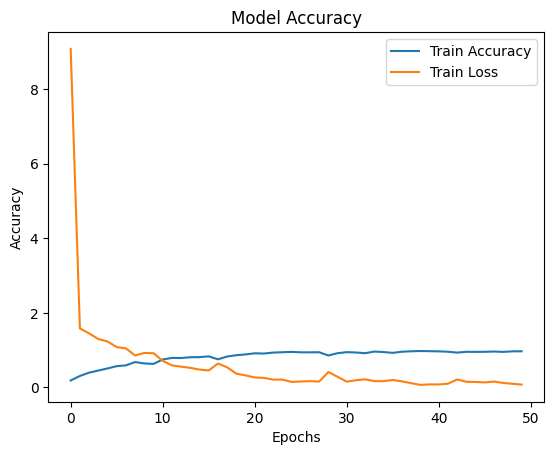

In [ ]:
from matplotlib import pyplot as plt 
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy','Train Loss'])
plt.show

In [ ]:
# Lưu lại
model.save("TienVN_CNN.h5")

In [ ]:
from tensorflow.keras.models import load_model
# Tải mô hình 
model_CNN=load_model('TienVN_CNN.h5')

In [ ]:
from sklearn import preprocessing
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

1/1 [==============================] - 0s 232ms/step
5.000 VND


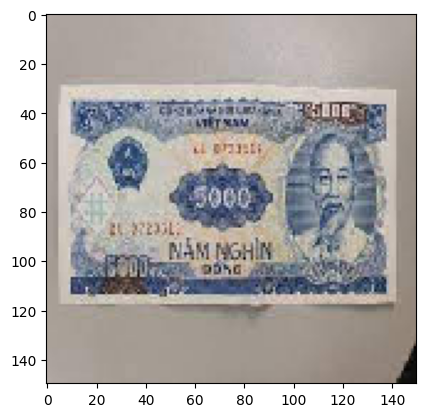

1/1 [==============================] - 0s 25ms/step
10.000 VND


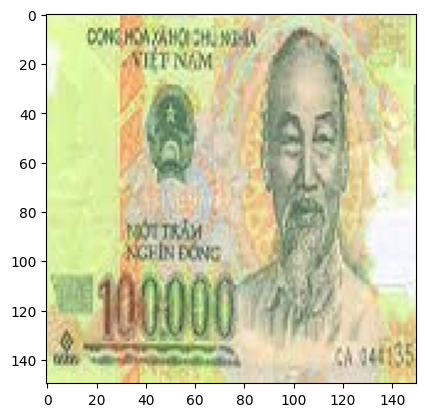

1/1 [==============================] - 0s 19ms/step
50.000 VND


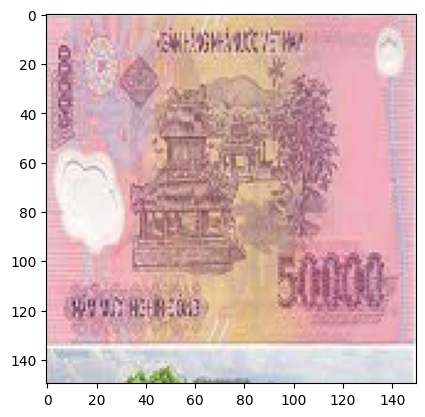

1/1 [==============================] - 0s 19ms/step
500.000 VND


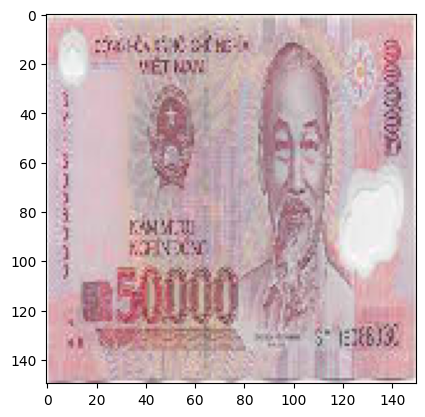

1/1 [==============================] - 0s 22ms/step
100.000 VND


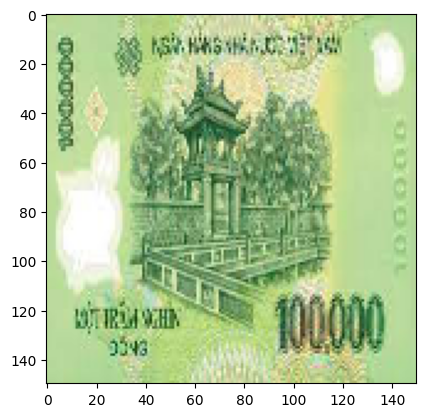

1/1 [==============================] - 0s 20ms/step
5.000 VND


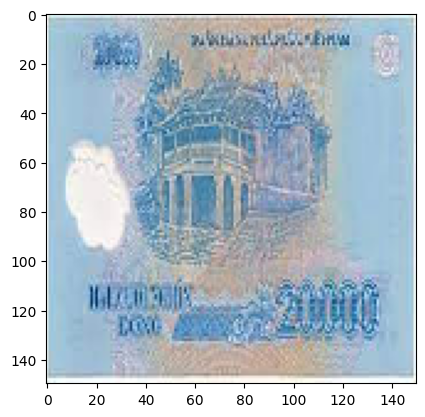

1/1 [==============================] - 0s 19ms/step
5.000 VND


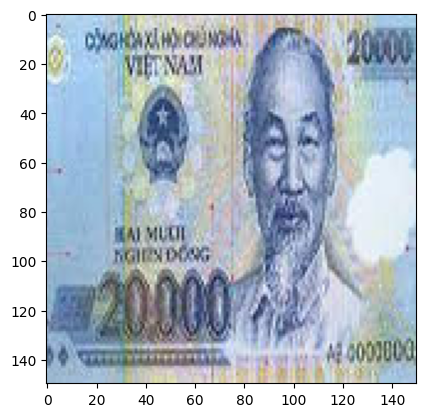

1/1 [==============================] - 0s 29ms/step
5.000 VND


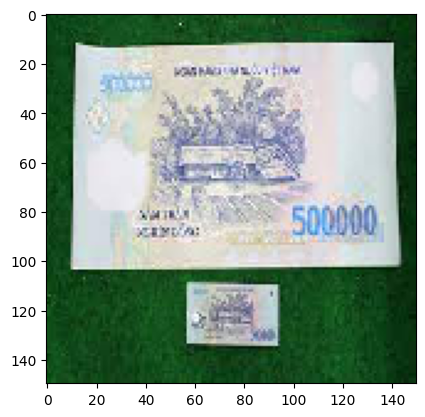

1/1 [==============================] - 0s 22ms/step
5.000 VND


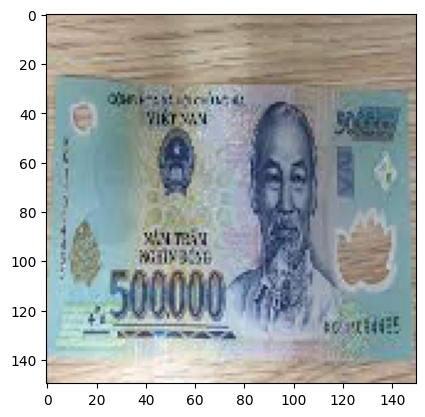

1/1 [==============================] - 0s 19ms/step
10.000 VND


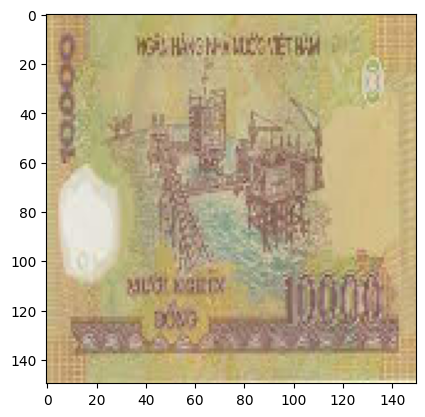

1/1 [==============================] - 0s 19ms/step
5.000 VND


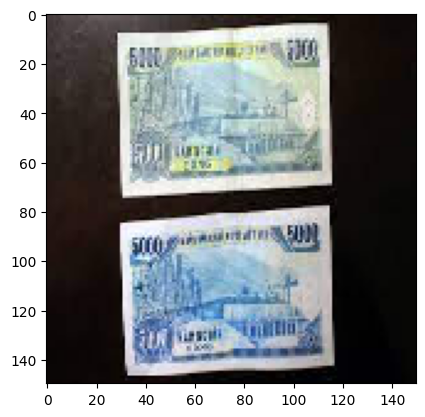

In [ ]:
test='/content/drive/MyDrive/Test_tien/Test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['100.000 VND','10.000 VND','20.000 VND','500.000 VND','50.000 VND','5.000 VND']
  
  print(class_name[result])
  plt.show()